In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib as db
from scipy import stats

In [2]:
#better data visibility

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#importing data
crimes_against_women = pd.read_csv('Raw Data\crimes_against_women_2001-2014.csv')

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\shobh\AppData\Local\Temp\ipykernel_18848\63457569.py:2: SyntaxWarning: invalid escape sequence '\c'
  crimes_against_women = pd.read_csv('Raw Data\crimes_against_women_2001-2014.csv')


In [4]:
#Ensuring same column name as Census data on which to be merged
crimes_against_women = crimes_against_women.rename(columns = {'DISTRICT':'District name'})
crimes_against_women = crimes_against_women.rename(columns = {'STATE/UT':'State name'})

In [5]:
#filtering relevant data
crimes_against_women.drop(axis = 1, columns='Unnamed: 0', inplace=True)
crimes_against_women = crimes_against_women[(crimes_against_women['Year'] == 2011) & (crimes_against_women['District name'] != 'TOTAL')]
crimes_against_women.reset_index(drop = True, inplace=True)

In [6]:
crimes_against_women.head(10)

,State name,District name,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2011,84,70,20,112,142,429,0
1,ANDHRA PRADESH,ANANTAPUR,2011,16,83,36,156,16,198,0
2,ANDHRA PRADESH,CHITTOOR,2011,17,47,25,124,168,421,0
3,ANDHRA PRADESH,CUDDAPAH,2011,41,65,15,144,17,122,0
4,ANDHRA PRADESH,CYBERABAD,2011,89,90,51,158,234,1411,0
5,ANDHRA PRADESH,EAST GODAVARI,2011,72,51,17,176,224,575,0
6,ANDHRA PRADESH,GUNTAKAL RLY.,2011,0,0,0,0,3,1,0
7,ANDHRA PRADESH,GUNTUR,2011,40,57,8,223,140,494,0
8,ANDHRA PRADESH,GUNTUR URBAN,2011,33,28,6,86,111,395,0
9,ANDHRA PRADESH,HYDERABAD CITY,2011,59,39,37,157,93,1355,0


In [7]:
crimes_against_women.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,757.00,757.00,757.00,757.00,757.00,757.00,757.00,757.00
mean,2011.00,32.73,49.74,11.57,57.63,11.54,133.04,0.11
std,0.00,40.80,96.23,16.49,75.98,33.48,259.09,0.82
min,2011.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2011.00,8.00,9.00,0.00,9.00,0.00,12.00,0.00
50%,2011.00,22.00,27.00,5.00,31.00,0.00,55.00,0.00
75%,2011.00,46.00,61.00,16.00,76.00,8.00,153.00,0.00
max,2011.00,572.00,2085.00,142.00,657.00,355.00,2956.00,10.00


In [8]:
#importing census data
census_data = pd.read_csv('Raw Data\india-districts-census-2011.csv')

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\shobh\AppData\Local\Temp\ipykernel_18848\2960875066.py:2: SyntaxWarning: invalid escape sequence '\i'
  census_data = pd.read_csv('Raw Data\india-districts-census-2011.csv')


In [9]:
census_data['Year'] = 2011

In [10]:
census_data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_Bicycle,Households_with_Car_Jeep_Van,Households_with_Radio_Transistor,Households_with_Scooter_Motorcycle_Moped,Households_with_Telephone_Mobile_Phone_Landline_only,Households_with_Telephone_Mobile_Phone_Mobile_only,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Households_with_Telephone_Mobile_Phone_Both,Condition_of_occupied_census_houses_Dilapidated_Households,Households_with_separate_kitchen_Cooking_inside_house,Having_bathing_facility_Total_Households,Having_latrine_facility_within_the_premises_Total_Households,Ownership_Owned_Households,Ownership_Rented_Households,Type_of_bathing_facility_Enclosure_without_roof_Households,Type_of_fuel_used_for_cooking_Any_other_Households,Type_of_latrine_facility_Pit_latrine_Households,Type_of_latrine_facility_Other_latrine_Households,Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households,Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households,Not_having_bathing_facility_within_the_premises_Total_Households,Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,Year
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,36913,33439,229064,190899,38165,123837,105227,641290,34680,56759,7946,129679,37128,823286,1700,5600,66,39,13,2522,15828,83071,762,5256,158438,23226,181664,60616,101642,99947,74948,39709,21751,6402,405015,289765,694780,600759,178435,89679,1481,3019,2988,59480,1808,1445,53437,495,26828,56495,1613,8463,104172

In [11]:
census_data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_Bicycle,Households_with_Car_Jeep_Van,Households_with_Radio_Transistor,Households_with_Scooter_Motorcycle_Moped,Households_with_Telephone_Mobile_Phone_Landline_only,Households_with_Telephone_Mobile_Phone_Mobile_only,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Households_with_Telephone_Mobile_Phone_Both,Condition_of_occupied_census_houses_Dilapidated_Households,Households_with_separate_kitchen_Cooking_inside_house,Having_bathing_facility_Total_Households,Having_latrine_facility_within_the_premises_Total_Households,Ownership_Owned_Households,Ownership_Rented_Households,Type_of_bathing_facility_Enclosure_without_roof_Households,Type_of_fuel_used_for_cooking_Any_other_Households,Type_of_latrine_facility_Pit_latrine_Households,Type_of_latrine_facility_Other_latrine_Households,Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households,Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households,Not_having_bathing_facility_within_the_premises_Total_Households,Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,Year
count,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640

In [12]:
pd.Series(census_data.columns)

0                                          District code
1                                             State name
2                                          District name
3                                             Population
4                                                   Male
5                                                 Female
6                                               Literate
7                                          Male_Literate
8                                        Female_Literate
9                                                     SC
10                                               Male_SC
11                                             Female_SC
12                                                    ST
13                                               Male_ST
14                                             Female_ST
15                                               Workers
16                                          Male_Workers
17                             

In [13]:
main_df_merged = pd.merge(crimes_against_women, census_data, how = 'inner', on = ['State name', 'District name'])
main_df_merged.shape

(0, 127)

As we can see the data is completely removed, we can make attempts to conserve as many data points as possible.

Possible reasons:
1. Spelling difference of State
2. Spelling difference of District
3. Both
4. Others (such as blank cell value)

Let's address each one by one.

1. Spelling difference of State

In [14]:
#count of states in crimes_against_women data
crimes_against_women['State name'].value_counts().count()

np.int64(35)

In [15]:
#count of states in census data
census_data['State name'].value_counts().count()

np.int64(35)

In [16]:
df_chk = pd.merge(crimes_against_women, census_data, how = 'outer', on = 'State name')
#count of states in merged data
df_chk['State name'].value_counts().count()

np.int64(37)

In [17]:
df_chk['State name'].value_counts()

State name
UTTAR PRADESH        5396
MADHYA PRADESH       2650
BIHAR                1672
MAHARASHTRA          1575
RAJASTHAN            1353
TAMIL NADU           1248
KARNATAKA            1050
GUJARAT               884
ASSAM                 810
ANDHRA PRADESH        759
JHARKHAND             624
PUNJAB                560
WEST BENGAL           475
HARYANA               462
CHHATTISGARH          396
KERALA                280
ARUNACHAL PRADESH     272
HIMACHAL PRADESH      180
UTTARAKHAND           169
DELHI                 162
NAGALAND              121
MANIPUR                90
MIZORAM                64
MEGHALAYA              49
ODISHA                 36
ORISSA                 30
JAMMU & KASHMIR        29
JAMMU AND KASHMIR      22
TRIPURA                20
SIKKIM                 16
PUDUCHERRY              8
A & N ISLANDS           6
DAMAN & DIU             4
GOA                     4
LAKSHADWEEP             1
D & N HAVELI            1
CHANDIGARH              1
Name: count, dtype: int64

Some state names excluded simply based on spelling or character differences are:
1. ODISHA vs. ORISSA
2. JAMMU AND KASHMIR vs. JAMMU & KASHMIR

In [18]:
#putting the names of the States correctly
crimes_against_women['State name'] = crimes_against_women['State name'].str.replace(r'\b(ORISSA|ODISHA)\b', 'ODISHA', regex=True)
crimes_against_women['State name'] = crimes_against_women['State name'].str.replace(r'\b(JAMMU AND KASHMIR|JAMMU & KASHMIR)\b', 'JAMMU AND KASHMIR', regex=True)

census_data['State name'] = census_data['State name'].str.replace(r'\b(ORISSA|ODISHA)\b', 'ODISHA', regex=True)
census_data['State name'] = census_data['State name'].str.replace(r'\b(JAMMU AND KASHMIR|JAMMU & KASHMIR)\b', 'JAMMU AND KASHMIR', regex=True)

2. Spelling difference of District

In [19]:
#count of districts in crimes_against_women data
crimes_against_women['District name'].value_counts().count()

np.int64(741)

In [20]:
#count of districts in census data
census_data['District name'].value_counts().count()

np.int64(636)

In [21]:
#removing any trailing whitespaces
crimes_against_women['District name'] = crimes_against_women['District name'].apply([lambda x: x.upper().strip()])
census_data['District name'] = census_data['District name'].apply([lambda x: x.upper().strip()])

In [22]:
#to check of which dataset the row/cell is of
crimes_against_women['Data from'] = 'Crimes Against Women'
census_data['Data from'] = 'Census data'
df_chk = pd.merge(crimes_against_women, census_data, how = 'outer', on = ['State name', 'District name'])
#count of districts in merged data
df_chk['District name'].value_counts().count()

np.int64(905)

In [23]:
df_chk.head(100)

,State name,District name,Year_x,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Data from_x,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_Bicycle,Households_with_Car_Jeep_Van,Households_with_Radio_Transistor,Households_with_Scooter_Motorcycle_Moped,Households_with_Telephone_Mobile_Phone_Landline_only,Households_with_Telephone_Mobile_Phone_Mobile_only,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Households_with_Telephone_Mobile_Phone_Both,Condition_of_occupied_census_houses_Dilapidated_Households,Households_with_separate_kitchen_Cooking_inside_house,Having_bathing_facility_Total_Households,Having_latrine_facility_within_the_premises_Total_Households,Ownership_Owned_Households,Ownership_Rented_Households,Type_of_bathing_facility_Enclosure_without_roof_Households,Type_of_fuel_used_for_cooking_Any_other_Households,Type_of_latrine_facility_Pit_latrine_Households,Type_of_latrine_facility_Other_latrine_Households,Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households,Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households,Not_having_bathing_facility_within_the_premises_Total_Households,Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,Year_y,Data from_y
0,A & N ISLANDS,ANDAMAN,2011.00,13.00,12.00,0.00,14.00,3.00,5.00,0.00,Crimes Against Women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [24]:
def sum_rural_urban(df):
    rows_to_remove = []
    rows_to_add = []

    for i, row in df.iterrows():
        # Check for specific keywords in the District name
        if re.search(r'\bURBAN|RURAL|SUBURBAN|RLY\.|CITY|COMMR\.|NAVI|CRIME|RAILWAYS\b', row['District name']):
            # Clean the District name
            district_name = re.sub(r'\bURBAN|RURAL|SUBURBAN|RLY\.|CITY|COMMR\.|NAVI|CRIME|RAILWAYS\b', '', row['District name']).strip()
            print(row['District name'], district_name)
            state_name = row['State name']
            year = row['Year']
            #data_from = row['Data from']
            # Construct expected district names
            l = ["URBAN", "RURAL", "SUBURBAN", "RLY.", "CITY", "COMMR.", "CRIME", "RAILWAYS"]
            exp = [district_name + " " + x for x in l]
            exp.append("NAVI " + district_name)
            # Find matching rows
            all_match = df[(df['District name'].isin(exp)) & (df['State name'] == state_name)]
            #print(all_match)
            # If matching rows exist and the cleaned district name is not already in the DataFrame
            if not all_match.empty:
                

                # Sum the values of all matching rows for the new district name
                summed_row = {col: all_match[col].sum() for col in df.columns if not col in ['District name', 'State name', 'Year', 'Data from']}
                summed_row['District name'] = district_name
                summed_row['State name'] = state_name
                summed_row['Year'] = year
                #summed_row['Data from'] = data_from

                rows_to_add.append(summed_row)
                rows_to_remove.extend(all_match.index.tolist())
                print("new rows generated")
                #print(f"Rows to add: {rows_to_add}")
                #print(f"Rows to remove: {rows_to_remove}")
    # Remove specified rows from the DataFrame
    df = df.drop(index=rows_to_remove)
    print("old rows dropped")
    # Add new rows if any were created
    if rows_to_add:
        new_rows_df = pd.DataFrame(rows_to_add)
        df = pd.concat([df, new_rows_df], ignore_index=True)
        print("new rows added")
    return df

In [25]:
crimes_against_women = sum_rural_urban(crimes_against_women)
census_data = sum_rural_urban(census_data)

GUNTAKAL RLY. GUNTAKAL
new rows generated
GUNTUR URBAN GUNTUR
new rows generated
HYDERABAD CITY HYDERABAD
new rows generated
SECUNDERABAD RLY. SECUNDERABAD
new rows generated
TIRUPATHI URBAN TIRUPATHI
new rows generated
VIJAYAWADA CITY VIJAYAWADA
new rows generated
VIJAYAWADA RLY. VIJAYAWADA
new rows generated
VISAKHA RURAL VISAKHA
new rows generated
WARANGAL URBAN WARANGAL
new rows generated
RURAL 
GUWAHATI CITY GUWAHATI
new rows generated
JAMALPUR RLY. JAMALPUR
new rows generated
KATIHAR RLY. KATIHAR
new rows generated
MUZAFFARPUR RLY. MUZAFFARPUR
new rows generated
PATNA RLY. PATNA
new rows generated
AHMEDABAD COMMR. AHMEDABAD
new rows generated
AHMEDABAD RURAL AHMEDABAD
new rows generated
CID CRIME CID
new rows generated
RAJKOT COMMR. RAJKOT
new rows generated
RAJKOT RURAL RAJKOT
new rows generated
SURAT COMMR. SURAT
new rows generated
SURAT RURAL SURAT
new rows generated
VADODARA COMMR. VADODARA
new rows generated
VADODARA RURAL VADODARA
new rows generated
CRIME JAMMU JAMMU
CRIME 

In [26]:
df_chk = pd.merge(crimes_against_women, census_data, how = 'outer', on = ['State name', 'District name'])
df_chk_nulls = df_chk[['State name', 'District name', 'Data from_x', 'Data from_y']][df_chk.isna().sum(axis = 1) >= 8].reset_index(drop=True)

In [27]:
df_chk_nulls['State name'].value_counts()

State name
ODISHA               32
WEST BENGAL          28
UTTAR PRADESH        27
TAMIL NADU           25
ARUNACHAL PRADESH    19
JAMMU AND KASHMIR    19
PUNJAB               18
GUJARAT              18
KARNATAKA            17
DELHI                15
MADHYA PRADESH       14
RAJASTHAN            14
JHARKHAND            13
ANDHRA PRADESH       12
MEGHALAYA            12
KERALA               10
BIHAR                 9
ASSAM                 9
CHHATTISGARH          8
UTTARAKHAND           8
SIKKIM                8
TRIPURA               7
HIMACHAL PRADESH      5
PUDUCHERRY            4
A & N ISLANDS         3
HARYANA               3
MANIPUR               1
Name: count, dtype: int64

In [28]:
df_chk_nulls[df_chk_nulls['State name'] == 'TAMIL NADU']

,State name,District name,Data from_x,Data from_y
263,TAMIL NADU,KANCHEEPURAM,NaN,Census data
264,TAMIL NADU,KANCHIPURAM,Crimes Against Women,NaN
265,TAMIL NADU,KANNIYAKUMARI,NaN,Census data
266,TAMIL NADU,KANYAKUMARI,Crimes Against Women,NaN
267,TAMIL NADU,NILGIRIS,Crimes Against Women,NaN
268,TAMIL NADU,PUDUKKOTTAI,NaN,Census data
269,TAMIL NADU,PUDUKOTTAI,Crimes Against Women,NaN
270,TAMIL NADU,RAMANATHAPURAM,NaN,Census data
271,TAMIL NADU,RAMNATHAPURAM,Crimes Against Women,NaN
272,TAMIL NADU,SIVAGANGA,NaN,Census data


In [29]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KANCHEEPURAM|KANCHIPURAM)\b', 'KANCHEEPURAM', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KANNIYAKUMARI|KANYAKUMARI)\b', 'KANYAKUMARI', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PUDUKKOTTAI|PUDUKOTTAI)\b', 'PUDUKOTTAI', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(RAMANATHAPURAM|RAMNATHAPURAM)\b', 'RAMANATHAPURAM', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SIVAGANGA|SIVAGANGAI)\b', 'SIVAGANGA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(THE NILGIRIS|NILGIRIS)\b', 'NILGIRIS', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(THOOTHUGUDI|THOOTHUKKUDI)\b', 'THOOTHUKKUDI', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(THIRUVANNAMALAI|TIRUVANNAMALAI)\b', 'TIRUVANNAMALAI', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(VILLUPURAM|VILUPPURAM)\b', 'VILUPPURAM', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(KANCHEEPURAM|KANCHIPURAM)\b', 'KANCHEEPURAM', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KANNIYAKUMARI|KANYAKUMARI)\b', 'KANYAKUMARI', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PUDUKKOTTAI|PUDUKOTTAI)\b', 'PUDUKOTTAI', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(RAMANATHAPURAM|RAMNATHAPURAM)\b', 'RAMANATHAPURAM', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SIVAGANGA|SIVAGANGAI)\b', 'SIVAGANGA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(THE NILGIRIS|NILGIRIS)\b', 'NILGIRIS', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(THOOTHUGUDI|THOOTHUKKUDI)\b', 'THOOTHUKKUDI', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(THIRUVANNAMALAI|TIRUVANNAMALAI)\b', 'TIRUVANNAMALAI', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(VILLUPURAM|VILUPPURAM)\b', 'VILUPPURAM', regex=True)

In [30]:
df_chk_nulls[df_chk_nulls['State name'] == 'ODISHA']

,State name,District name,Data from_x,Data from_y
187,ODISHA,ANGUL,Crimes Against Women,NaN
188,ODISHA,ANUGUL,NaN,Census data
189,ODISHA,BALANGIR,NaN,Census data
190,ODISHA,BALASORE,Crimes Against Women,NaN
191,ODISHA,BALESHWAR,NaN,Census data
192,ODISHA,BARAGARH,Crimes Against Women,NaN
193,ODISHA,BARGARH,NaN,Census data
194,ODISHA,BAUDH,NaN,Census data
195,ODISHA,BERHAMPUR,Crimes Against Women,NaN
196,ODISHA,BOLANGIR,Crimes Against Women,NaN


In [31]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(ANGUL|ANUGUL)\b', 'ANGUL', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BALANGIR|BOLANGIR)\b', 'BALANGIR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BALASORE|BALESHWAR)\b', 'BALASORE', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BARAGARH|BARGARH)\b', 'BARAGARH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BAUDH|BOUDH)\b', 'BOUDH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(DEBAGARH|DEOGARH)\b', 'DEOGARH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(JAGATSINGHAPUR|JAGATSINGHPUR)\b', 'JAGATSINGHPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(JAJAPUR|JAJPUR)\b', 'JAJPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KENDUJHAR|KEONJHAR)\b', 'KEONJHAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KHORDHA|KHURDA)\b', 'KHURDA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(JAJAPUR|JAJPUR)\b', 'JAJPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(MALKANGIR|MALKANGIRI)\b', 'MALKANGIR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(NABARANGAPUR|NOWRANGPUR)\b', 'NABARANGAPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(ROURKELA|SRP\(ROURKELA\))\b', 'ROURKELA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SONEPUR|SUBARNAPUR)\b', 'SUBARNAPUR', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(ANGUL|ANUGUL)\b', 'ANGUL', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(BALANGIR|BOLANGIR)\b', 'BALANGIR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(BALASORE|BALESHWAR)\b', 'BALASORE', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(BARAGARH|BARGARH)\b', 'BARAGARH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(BAUDH|BOUDH)\b', 'BOUDH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(DEBAGARH|DEOGARH)\b', 'DEOGARH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(JAGATSINGHAPUR|JAGATSINGHPUR)\b', 'JAGATSINGHPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(JAJAPUR|JAJPUR)\b', 'JAJPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KENDUJHAR|KEONJHAR)\b', 'KEONJHAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KHORDHA|KHURDA)\b', 'KHURDA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(JAJAPUR|JAJPUR)\b', 'JAJPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(MALKANGIR|MALKANGIRI)\b', 'MALKANGIR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(NABARANGAPUR|NOWRANGPUR)\b', 'NABARANGAPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(ROURKELA|SRP(ROURKELA))\b', 'ROURKELA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SONEPUR|SUBARNAPUR)\b', 'SUBARNAPUR', regex=True)

In [32]:
df_chk_nulls[df_chk_nulls['State name'] == 'GUJARAT']

,State name,District name,Data from_x,Data from_y
75,GUJARAT,AHWA-DANG,Crimes Against Women,NaN
76,GUJARAT,BANAS KANTHA,NaN,Census data
77,GUJARAT,CID,NaN,NaN
78,GUJARAT,DAHOD,Crimes Against Women,NaN
79,GUJARAT,DOHAD,NaN,Census data
80,GUJARAT,HIMATNAGAR,Crimes Against Women,NaN
81,GUJARAT,KACHCHH,NaN,Census data
82,GUJARAT,KHEDA,NaN,Census data
83,GUJARAT,KHEDA NORTH,Crimes Against Women,NaN
84,GUJARAT,KUTCH (EAST(G)),Crimes Against Women,NaN


In [33]:
state_name = "GUJARAT"
district_name = "KUTCH"
exp = "KUTCH ((G)) EAST"
exp1 = "KUTCH (-BHUJ) WEST"

# Get Rural and Commissioner matching rows
rural_match = crimes_against_women[(crimes_against_women['District name'] == exp) & (crimes_against_women['State name'] == state_name)]
other_match = crimes_against_women[(crimes_against_women['District name'] == exp1) & (crimes_against_women['State name'] == state_name)]

if not rural_match.empty and not other_match.empty and (district_name not in crimes_against_women['District name'].values):
    
    d_temp_1 = dict(rural_match.iloc[0][crimes_against_women.columns[0:3]])
    d_temp_2 = dict(rural_match.iloc[0][crimes_against_women.columns[-len(crimes_against_women.columns)+3:-1]] + other_match.iloc[0][crimes_against_women.columns[-len(crimes_against_women.columns)+3:-1]])
    d_temp_3 = dict(rural_match.iloc[0][crimes_against_women.columns[-1:]])
    
    d_temp = {}
    d_temp.update(d_temp_1)
    d_temp.update(d_temp_2)
    d_temp.update(d_temp_3)
    d_temp['District name'] = district_name
    
    crimes_against_women.loc[len(crimes_against_women)] = d_temp
    crimes_against_women = crimes_against_women[(crimes_against_women['District name'] != exp) & (crimes_against_women['District name'] != exp1)]

In [34]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(DAHOD|DOHAD)\b', 'DAHOD', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PANCH MAHALS|PANCHMAHAL)\b', 'PANCHMAHAL', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(AHWA-DANG|THE DANGS)\b', 'AHWA-DANG', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KACHCHH|KUTCH)\b', 'KACHCHH', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(DAHOD|DOHAD)\b', 'DAHOD', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PANCH MAHALS|PANCHMAHAL)\b', 'PANCHMAHAL', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(AHWA-DANG|THE DANGS)\b', 'AHWA-DANG', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KACHCHH|KUTCH)\b', 'KACHCHH', regex=True)

In [35]:
df_chk_nulls[df_chk_nulls['State name'] == 'UTTAR PRADESH']

,State name,District name,Data from_x,Data from_y
295,UTTAR PRADESH,BADAUN,Crimes Against Women,NaN
296,UTTAR PRADESH,BHIM NAGAR,Crimes Against Women,NaN
297,UTTAR PRADESH,BUDAUN,NaN,Census data
298,UTTAR PRADESH,CHITRAKOOT,NaN,Census data
299,UTTAR PRADESH,CHITRAKOOT DHAM,Crimes Against Women,NaN
300,UTTAR PRADESH,CSM NAGAR,Crimes Against Women,NaN
301,UTTAR PRADESH,FARRUKHABAD,NaN,Census data
302,UTTAR PRADESH,FATEHGARH,Crimes Against Women,NaN
303,UTTAR PRADESH,G.R.P.,Crimes Against Women,NaN
304,UTTAR PRADESH,GAUTAM BUDDHA NAGAR,NaN,Census data


In [36]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BADAUN|BUDAUN)\b', 'BADAUN', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(CHITRAKOOT|CHITRAKOOT DHAM)\b', 'CHITRAKOOT', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(GAUTAM BUDDHA NAGAR|GAUTAMBUDH NAGAR)\b', 'GAUTAM BUDDHA NAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(HATHRAS|MAHAMAYA NAGAR)\b', 'HATHRAS', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KHERI|KHIRI)\b', 'KHERI', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(RAE BARELI|RAIBAREILLY)\b', 'RAE BARELI', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SANT KABIR NAGAR|SANT KABIRNAGAR)\b', 'SANT KABIRNAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SANT RAVIDAS NAGAR (BHADOHI)|ST.RAVIDASNAGAR)\b', 'SANT RAVIDAS NAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SIDDHARTHNAGAR|SIDHARTHNAGAR)\b', 'SIDHARTHNAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(RAMABAI NAGAR|KANPUR DEHAT)\b', 'KANPUR DEHAT', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(BADAUN|BUDAUN)\b', 'BADAUN', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(CHITRAKOOT|CHITRAKOOT DHAM)\b', 'CHITRAKOOT', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(GAUTAM BUDDHA NAGAR|GAUTAMBUDH NAGAR)\b', 'GAUTAM BUDDHA NAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(HATHRAS|MAHAMAYA NAGAR)\b', 'HATHRAS', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KHERI|KHIRI)\b', 'KHERI', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(RAE BARELI|RAIBAREILLY)\b', 'RAE BARELI', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SANT KABIR NAGAR|SANT KABIRNAGAR)\b', 'SANT KABIRNAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SANT RAVIDAS NAGAR (BHADOHI)|ST.RAVIDASNAGAR)\b', 'SANT RAVIDAS NAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SIDDHARTHNAGAR|SIDHARTHNAGAR)\b', 'SIDHARTHNAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(RAMABAI NAGAR|KANPUR DEHAT)\b', 'KANPUR DEHAT', regex=True)

In [37]:
df_chk_nulls[df_chk_nulls['State name'] == 'RAJASTHAN']

,State name,District name,Data from_x,Data from_y
241,RAJASTHAN,CHITTAURGARH,NaN,Census data
242,RAJASTHAN,CHITTORGARH,Crimes Against Women,NaN
243,RAJASTHAN,DHAULPUR,NaN,Census data
244,RAJASTHAN,DHOLPUR,Crimes Against Women,NaN
245,RAJASTHAN,G.R.P.AJMER,Crimes Against Women,NaN
246,RAJASTHAN,G.R.P.JODHPUR,Crimes Against Women,NaN
247,RAJASTHAN,JAIPUR EAST,Crimes Against Women,NaN
248,RAJASTHAN,JAIPUR NORTH,Crimes Against Women,NaN
249,RAJASTHAN,JAIPUR SOUTH,Crimes Against Women,NaN
250,RAJASTHAN,JAIPUR WEST,Crimes Against Women,NaN


In [38]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(CHITTAURGARH|CHITTORGARH)\b', 'CHITTORGARH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(DHAULPUR|DHOLPUR)\b', 'DHOLPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(JALOR|JALORE)\b', 'JALORE', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(JHUNJHUNU|JHUNJHUNUN)\b', 'JHUNJHUNU', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(CHITTAURGARH|CHITTORGARH)\b', 'CHITTORGARH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(DHAULPUR|DHOLPUR)\b', 'DHOLPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(JALOR|JALORE)\b', 'JALORE', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(JHUNJHUNU|JHUNJHUNUN)\b', 'JHUNJHUNU', regex=True)

In [39]:
state_name = "RAJASTHAN"
district_name = "JAIPUR"

exp1 = "JAIPUR RURAL"
exp = ["JAIPUR NORTH","JAIPUR EAST", "JAIPUR SOUTH", "JAIPUR WEST"]

# Get Rural and Commissioner matching rows
rural_match = crimes_against_women[(crimes_against_women['District name'].isin(exp)) & (crimes_against_women['State name'] == state_name)]
other_match = crimes_against_women[(crimes_against_women['District name'] == exp1) & (crimes_against_women['State name'] == state_name)]

if not rural_match.empty and not other_match.empty and (district_name not in crimes_against_women['District name'].values):
    
    d_temp_1 = dict(rural_match.iloc[0][crimes_against_women.columns[0:3]])
    d_temp_2 = dict(rural_match.iloc[0][crimes_against_women.columns[-len(crimes_against_women.columns)+3:-1]] + other_match.iloc[0][crimes_against_women.columns[-len(crimes_against_women.columns)+3:-1]])
    d_temp_3 = dict(rural_match.iloc[0][crimes_against_women.columns[-1:]])
    
    d_temp = {}
    d_temp.update(d_temp_1)
    d_temp.update(d_temp_2)
    d_temp.update(d_temp_3)
    d_temp['District name'] = district_name
    
    crimes_against_women.loc[len(crimes_against_women)] = d_temp
    crimes_against_women = crimes_against_women[(~crimes_against_women['District name'].isin(exp)) & (crimes_against_women['District name'] != exp1)]

In [40]:
df_chk_nulls[df_chk_nulls['State name'] == 'WEST BENGAL']

,State name,District name,Data from_x,Data from_y
330,WEST BENGAL,24 PARGANAS NORTH,Crimes Against Women,NaN
331,WEST BENGAL,24 PARGANAS SOUTH,Crimes Against Women,NaN
332,WEST BENGAL,ASANSOL,Crimes Against Women,NaN
333,WEST BENGAL,BARDDHAMAN,NaN,Census data
334,WEST BENGAL,BURDWAN,Crimes Against Women,NaN
335,WEST BENGAL,COOCHBEHAR,Crimes Against Women,NaN
336,WEST BENGAL,DARJEELING,Crimes Against Women,NaN
337,WEST BENGAL,DARJILING,NaN,Census data
338,WEST BENGAL,HAORA,NaN,Census data
339,WEST BENGAL,HOOGHLY,Crimes Against Women,NaN


In [41]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(24 PARGANAS NORTH|NORTH TWENTY FOUR PARGANAS)\b', '24 PARGANAS NORTH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(24 PARGANAS SOUTH|SOUTH TWENTY FOUR PARGANAS)\b', '24 PARGANAS SOUTH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(DARJILING|DARJEELING)\b', 'DARJEELING', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(HAORA|HOWRAH CITY)\b', 'HOWRAH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(HUGLI|HOOGHLY)\b', 'HOOGHLY', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PASCHIM MEDINIPUR|PASCHIM MIDNAPUR)\b', 'PASCHIM MIDNAPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PURULIA|PURULIYA)\b', 'PURULIA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(MALDAH|MALDA)\b', 'MALDAH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KOCH BIHAR|COOCHBEHAR)\b', 'COOCHBEHAR', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(24 PARGANAS NORTH|TWENTY FOUR PARGANAS NORTH)\b', '24 PARGANAS NORTH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(24 PARGANAS SOUTH|TWENTY FOUR PARGANAS SOUTH)\b', '24 PARGANAS SOUTH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(DARJILING|DARJEELING)\b', 'DARJEELING', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(HAORA|HOWRAH CITY)\b', 'HOWRAH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(HUGLI|HOOGHLY)\b', 'HOOGHLY', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PASCHIM MEDINIPUR|PASCHIM MIDNAPUR)\b', 'PASCHIM MIDNAPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PURULIA|PURULIYA)\b', 'PURULIA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(MALDAH|MALDA)\b', 'MALDAH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KOCH BIHAR|COOCHBEHAR)\b', 'COOCHBEHAR', regex=True)

In [42]:
df_chk_nulls[df_chk_nulls['State name'] == 'ARUNACHAL PRADESH']

,State name,District name,Data from_x,Data from_y
15,ARUNACHAL PRADESH,EAST KAMENG,NaN,Census data
16,ARUNACHAL PRADESH,EAST SIANG,NaN,Census data
17,ARUNACHAL PRADESH,K/KUMEY,Crimes Against Women,NaN
18,ARUNACHAL PRADESH,KAMENG EAST,Crimes Against Women,NaN
19,ARUNACHAL PRADESH,KAMENG WEST,Crimes Against Women,NaN
20,ARUNACHAL PRADESH,KURUNG KUMEY,NaN,Census data
21,ARUNACHAL PRADESH,LOWER DIBANG VALLEY,NaN,Census data
22,ARUNACHAL PRADESH,LOWER SUBANSIRI,NaN,Census data
23,ARUNACHAL PRADESH,RURAL,Crimes Against Women,NaN
24,ARUNACHAL PRADESH,SIANG EAST,Crimes Against Women,NaN


In [43]:
# Replace variations of district names in 'census_data'
census_data['District name'] = census_data['District name'].str.replace(r'\b(K/KUMEY|KURUNG KUMEY)\b', 'KUMEY', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KAMENG EAST|EAST KAMENG)\b', 'KAMENG EAST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KAMENG WEST|W. KAMENG)\b', 'KAMENG WEST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SIANG EAST|EAST SIANG)\b', 'SIANG EAST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SIANG UPPER)\b', 'SIANG UPPER', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SIANG WEST)\b', 'SIANG WEST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SUBANSIRI LOWER)\b', 'SUBANSIRI LOWER', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SUBANSIRI UPPER)\b', 'SUBANSIRI UPPER', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(UPPER DIBANG VALLEY)\b', 'UPPER DIBANG VALLEY', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(LOWER DIBANG VALLEY)\b', 'LOWER DIBANG VALLEY', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(LOWER SUBANSIRI)\b', 'LOWER SUBANSIRI', regex=True)

# Replace variations of district names in 'crimes_against_women'
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(K/KUMEY|KURUNG KUMEY)\b', 'KUMEY', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KAMENG EAST|EAST KAMENG)\b', 'KAMENG EAST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KAMENG WEST|W. KAMENG)\b', 'KAMENG WEST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SIANG EAST|EAST SIANG)\b', 'SIANG EAST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SIANG UPPER)\b', 'SIANG UPPER', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SIANG WEST)\b', 'SIANG WEST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SUBANSIRI LOWER)\b', 'SUBANSIRI LOWER', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SUBANSIRI UPPER)\b', 'SUBANSIRI UPPER', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(UPPER DIBANG VALLEY)\b', 'UPPER DIBANG VALLEY', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(LOWER DIBANG VALLEY)\b', 'LOWER DIBANG VALLEY', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(LOWER SUBANSIRI)\b', 'LOWER SUBANSIRI', regex=True)

In [44]:
df_chk_nulls[df_chk_nulls['State name'] == 'KARNATAKA']

,State name,District name,Data from_x,Data from_y
133,KARNATAKA,CBPURA,Crimes Against Women,NaN
134,KARNATAKA,CHAMARAJANAGAR,NaN,Census data
135,KARNATAKA,CHAMARAJNAGAR,Crimes Against Women,NaN
136,KARNATAKA,CHICKMAGALUR,Crimes Against Women,NaN
137,KARNATAKA,CHIKKABALLAPURA,NaN,Census data
138,KARNATAKA,CHIKMAGALUR,NaN,Census data
139,KARNATAKA,DAKSHIN KANNADA,Crimes Against Women,NaN
140,KARNATAKA,DAKSHINA KANNADA,NaN,Census data
141,KARNATAKA,K.G.F.,Crimes Against Women,NaN
142,KARNATAKA,MANGALORE,NaN,NaN


In [45]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(CHAMARAJANAGAR|CHAMARAJNAGAR)\b', 'CHAMARAJNAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(CHICKMAGALUR|CHIKMAGALUR)\b', 'CHIKMAGALUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(DAKSHIN KANNADA|DAKSHINA KANNADA)\b', 'DAKSHIN KANNADA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(RAMANAGAR|RAMANAGAR)\b', 'RAMANAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(UTTAR KANNADA|UTTARA KANNADA)\b', 'UTTAR KANNADA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(YADGIR|YADGIRI)\b', 'YADGIR', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(CHAMARAJANAGAR|CHAMARAJNAGAR)\b', 'CHAMARAJNAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(CHICKMAGALUR|CHIKMAGALUR)\b', 'CHIKMAGALUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(DAKSHIN KANNADA|DAKSHINA KANNADA)\b', 'DAKSHIN KANNADA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(RAMANAGAR|RAMANAGAR)\b', 'RAMANAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(UTTAR KANNADA|UTTARA KANNADA)\b', 'UTTAR KANNADA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(YADGIR|YADGIRI)\b', 'YADGIR', regex=True)

In [46]:
state_name = "KARNATAKA"
district_name = "BANGALORE"

exp = "BANGALORE RURAL"

# Get Rural and Commissioner matching rows
rural_match = census_data[(census_data['District name'] == exp) & (census_data['State name'] == state_name)]
other_match = census_data[(census_data['District name'] == district_name) & (census_data['State name'] == state_name)]
if not rural_match.empty:
    
    d_temp_1 = dict(rural_match.iloc[0][census_data.columns[0:3]])
    d_temp_2 = dict(rural_match.iloc[0][census_data.columns[-len(census_data.columns)+3:-1]] + other_match.iloc[0][census_data.columns[-len(census_data.columns)+3:-1]])
    d_temp_3 = dict(rural_match.iloc[0][census_data.columns[-1:]])
    
    d_temp = {}
    d_temp.update(d_temp_1)
    d_temp.update(d_temp_2)
    d_temp.update(d_temp_3)
    d_temp['District name'] = district_name
    
    census_data.loc[len(census_data)] = d_temp
    census_data = census_data[(census_data['District name'] != exp)]

In [47]:
df_chk_nulls[df_chk_nulls['State name'] == 'JAMMU AND KASHMIR']

,State name,District name,Data from_x,Data from_y
101,JAMMU AND KASHMIR,AWANTIPORA,Crimes Against Women,NaN
102,JAMMU AND KASHMIR,BADGAM,NaN,Census data
103,JAMMU AND KASHMIR,BANDIPORA,Crimes Against Women,NaN
104,JAMMU AND KASHMIR,BANDIPORE,NaN,Census data
105,JAMMU AND KASHMIR,BARAMULA,NaN,Census data
106,JAMMU AND KASHMIR,BARAMULLA,Crimes Against Women,NaN
107,JAMMU AND KASHMIR,BUDGAM,Crimes Against Women,NaN
108,JAMMU AND KASHMIR,CRIME JAMMU,Crimes Against Women,NaN
109,JAMMU AND KASHMIR,CRIME SRINAGAR,Crimes Against Women,NaN
110,JAMMU AND KASHMIR,HANDWARA,Crimes Against Women,NaN


In [48]:
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BADGAM|BUDGAM)\b', 'BUDGAM', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BANDIPORA|BANDIPORE)\b', 'BANDIPORA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BARAMULA|BARAMULLA)\b', 'BARAMULLA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(LEH|LEH(LADAKH))\b', 'LEH(LADAKH)', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(POONCH|PUNCH)\b', 'PUNCH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SHOPIAN|SHUPIYAN)\b', 'SHOPIAN', regex=True)

census_data['District name'] = census_data['District name'].str.replace(r'\b(BADGAM|BUDGAM)\b', 'BUDGAM', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(BANDIPORA|BANDIPORE)\b', 'BANDIPORA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(BARAMULA|BARAMULLA)\b', 'BARAMULLA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(LEH|LEH(LADAKH))\b', 'LEH(LADAKH)', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(POONCH|PUNCH)\b', 'PUNCH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SHOPIAN|SHUPIYAN)\b', 'SHOPIAN', regex=True)

In [49]:
df_chk_nulls[df_chk_nulls['State name'] == 'PUNJAB']

,State name,District name,Data from_x,Data from_y
223,PUNJAB,BATALA,Crimes Against Women,NaN
224,PUNJAB,BATHINDA,NaN,Census data
225,PUNJAB,BHATINDA,Crimes Against Women,NaN
226,PUNJAB,CP AMRITSAR,Crimes Against Women,NaN
227,PUNJAB,CP JALANDHAR,Crimes Against Women,NaN
228,PUNJAB,CP LUDHIANA,Crimes Against Women,NaN
229,PUNJAB,FAZILKA,Crimes Against Women,NaN
230,PUNJAB,FEROZPUR,Crimes Against Women,NaN
231,PUNJAB,FIROZPUR,NaN,Census data
232,PUNJAB,G.R.P,Crimes Against Women,NaN


In [50]:
census_data['District name'] = census_data['District name'].str.replace(r'\b(BATHINDA|BHATINDA)\b', 'BHATINDA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(FEROZPUR|FIROZPUR)\b', 'FIROZPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SAS NGR|SAHIBZADA AJIT SINGH NAGAR)\b', 'SAHIBZADA AJIT SINGH NAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SBS NAGAR|SHAHID BHAGAT SINGH NAGAR)\b', 'SHAHID BHAGAT SINGH NAGAR', regex=True)

crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BATHINDA|BHATINDA)\b', 'BHATINDA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(FEROZPUR|FIROZPUR)\b', 'FIROZPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SAS NGR|SAHIBZADA AJIT SINGH NAGAR)\b', 'SAHIBZADA AJIT SINGH NAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SBS NAGAR|SHAHID BHAGAT SINGH NAGAR)\b', 'SHAHID BHAGAT SINGH NAGAR', regex=True)

In [51]:
df_chk_nulls[df_chk_nulls['State name'] == 'MADHYA PRADESH']

,State name,District name,Data from_x,Data from_y
160,MADHYA PRADESH,ASHOK NAGAR,Crimes Against Women,NaN
161,MADHYA PRADESH,ASHOKNAGAR,NaN,Census data
162,MADHYA PRADESH,DATIA,NaN,Census data
163,MADHYA PRADESH,DATIYA,Crimes Against Women,NaN
164,MADHYA PRADESH,KHANDWA,Crimes Against Women,NaN
165,MADHYA PRADESH,KHANDWA (EAST NIMAR),NaN,Census data
166,MADHYA PRADESH,KHARGON,Crimes Against Women,NaN
167,MADHYA PRADESH,KHARGONE (WEST NIMAR),NaN,Census data
168,MADHYA PRADESH,NARSIMHAPUR,NaN,Census data
169,MADHYA PRADESH,NARSINGHPUR,Crimes Against Women,NaN


In [52]:
census_data['District name'] = census_data['District name'].str.replace(r'\b(ASHOK NAGAR|ASHOKNAGAR)\b', 'ASHOKNAGAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(DATIA|DATIYA)\b', 'DATIA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KHANDWA|KHANDWA \(EAST NIMAR\))\b', 'KHANDWA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KHARGON|KHARGONE \(WEST NIMAR\))\b', 'KHARGONE', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(NARSIMHAPUR|NARSINGHPUR)\b', 'NARSINGHPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SEHORE|SIHORE)\b', 'SEHORE', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(UMARIA|UMARIYA)\b', 'UMARIA', regex=True)


crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(ASHOK NAGAR|ASHOKNAGAR)\b', 'ASHOKNAGAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(DATIA|DATIYA)\b', 'DATIA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KHANDWA|KHANDWA \(EAST NIMAR\))\b', 'KHANDWA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KHARGON|KHARGONE \(WEST NIMAR\))\b', 'KHARGONE', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(NARSIMHAPUR|NARSINGHPUR)\b', 'NARSINGHPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SEHORE|SIHORE)\b', 'SEHORE', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(UMARIA|UMARIYA)\b', 'UMARIA', regex=True)

In [53]:
df_chk_nulls[df_chk_nulls['State name'] == 'ANDHRA PRADESH']

,State name,District name,Data from_x,Data from_y
3,ANDHRA PRADESH,CUDDAPAH,Crimes Against Women,NaN
4,ANDHRA PRADESH,CYBERABAD,Crimes Against Women,NaN
5,ANDHRA PRADESH,GUNTAKAL,NaN,NaN
6,ANDHRA PRADESH,NELLORE,Crimes Against Women,NaN
7,ANDHRA PRADESH,RAJAHMUNDRY,Crimes Against Women,NaN
8,ANDHRA PRADESH,SECUNDERABAD,NaN,NaN
9,ANDHRA PRADESH,SRI POTTI SRIRAMULU NELLORE,NaN,Census data
10,ANDHRA PRADESH,TIRUPATHI,NaN,NaN
11,ANDHRA PRADESH,VIJAYAWADA,NaN,NaN
12,ANDHRA PRADESH,VIJAYAWADA,NaN,NaN


In [54]:
census_data['District name'] = census_data['District name'].str.replace(r'\b(CUDDAPAH|Y.S.R.)\b', 'Y.S.R.', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(HYDERABAD|HYDERABAD CITY)\b', 'HYDERABAD', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(NELLORE|SRI POTTI SRIRAMULU NELLORE)\b', 'NELLORE', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(VIJAYAWADA CITY|VIJAYAWADA RLY.)\b', 'VIJAYAWADA', regex=True)

crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(CUDDAPAH|Y.S.R.)\b', 'Y.S.R.', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(HYDERABAD|HYDERABAD CITY)\b', 'HYDERABAD', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(NELLORE|SRI POTTI SRIRAMULU NELLORE)\b', 'NELLORE', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(VIJAYAWADA CITY|VIJAYAWADA RLY.)\b', 'VIJAYAWADA', regex=True)

In [55]:
df_chk_nulls[df_chk_nulls['State name'] == 'DELHI']

,State name,District name,Data from_x,Data from_y
60,DELHI,CAW,Crimes Against Women,NaN
61,DELHI,CRIME BRANCH,Crimes Against Women,NaN
62,DELHI,DELHI UT TOTAL,Crimes Against Women,NaN
63,DELHI,EOW,Crimes Against Women,NaN
64,DELHI,GRP(RLY),Crimes Against Women,NaN
65,DELHI,IGI AIRPORT,Crimes Against Women,NaN
66,DELHI,NORTH EAST,NaN,Census data
67,DELHI,NORTH WEST,NaN,Census data
68,DELHI,NORTH-EAST,Crimes Against Women,NaN
69,DELHI,NORTH-WEST,Crimes Against Women,NaN


In [56]:
census_data['District name'] = census_data['District name'].str.replace(r'\b(NORTH EAST|NORTH-EAST)\b', 'NORTH EAST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(NORTH WEST|NORTH-WEST)\b', 'NORTH WEST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SOUTH WEST|SOUTH-WEST)\b', 'SOUTH WEST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SOUTH EAST|SOUTH-EAST)\b', 'SOUTH EAST', regex=True)

crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(NORTH EAST|NORTH-EAST)\b', 'NORTH EAST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(NORTH WEST|NORTH-WEST)\b', 'NORTH WEST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SOUTH WEST|SOUTH-WEST)\b', 'SOUTH WEST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SOUTH EAST|SOUTH-EAST)\b', 'SOUTH EAST', regex=True)

In [57]:
df_chk_nulls[df_chk_nulls['State name'] == 'JHARKHAND']

,State name,District name,Data from_x,Data from_y
120,JHARKHAND,CHAIBASA,Crimes Against Women,NaN
121,JHARKHAND,JAMSHEDPUR,Crimes Against Women,NaN
122,JHARKHAND,JAMSHEDPUR,NaN,NaN
123,JHARKHAND,KODARMA,NaN,Census data
124,JHARKHAND,KODERMA,Crimes Against Women,NaN
125,JHARKHAND,LOHARDAGA,NaN,Census data
126,JHARKHAND,LOHARDAGGA,Crimes Against Women,NaN
127,JHARKHAND,PASHCHIMI SINGHBHUM,NaN,Census data
128,JHARKHAND,PURBI SINGHBHUM,NaN,Census data
129,JHARKHAND,SAHEBGANJ,Crimes Against Women,NaN


In [58]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(LOHARDAGA|LOHARDAGGA)\b', 'LOHARDAGA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KODARMA|KODERMA)\b', 'KODERMA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PASHCHIMI SINGHBHUM|PURBI SINGHBHUM|SAHEBGANJ|SAHIBGANJ)\b', 'SINGHBHUM', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SARAIKELA|SARAIKELA-KHARSAWAN)\b', 'SARAIKELA', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(LOHARDAGA|LOHARDAGGA)\b', 'LOHARDAGA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KODARMA|KODERMA)\b', 'KODERMA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PASHCHIMI SINGHBHUM|PURBI SINGHBHUM|SAHEBGANJ|SAHIBGANJ)\b', 'SINGHBHUM', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SARAIKELA|SARAIKELA-KHARSAWAN)\b', 'SARAIKELA', regex=True)

In [59]:
df_chk_nulls[df_chk_nulls['State name'] == 'MEGHALAYA']

,State name,District name,Data from_x,Data from_y
175,MEGHALAYA,EAST GARO HILLS,NaN,Census data
176,MEGHALAYA,EAST KHASI HILLS,NaN,Census data
177,MEGHALAYA,GARO HILLS EAST,Crimes Against Women,NaN
178,MEGHALAYA,GARO HILLS SOUTH,Crimes Against Women,NaN
179,MEGHALAYA,GARO HILLS WEST,Crimes Against Women,NaN
180,MEGHALAYA,KHASI HILLS EAST,Crimes Against Women,NaN
181,MEGHALAYA,KHASI HILLS WEST,Crimes Against Women,NaN
182,MEGHALAYA,RI-BHOI,Crimes Against Women,NaN
183,MEGHALAYA,RIBHOI,NaN,Census data
184,MEGHALAYA,SOUTH GARO HILLS,NaN,Census data


In [60]:
census_data['District name'] = census_data['District name'].str.replace(r'\b(EAST GARO HILLS|GARO HILLS EAST)\b', 'EAST GARO HILLS', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SOUTH GARO HILLS|GARO HILLS SOUTH)\b', 'SOUTH GARO HILLS', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(WEST GARO HILLS|GARO HILLS WEST)\b', 'WEST GARO HILLS', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(EAST KHASI HILLS|KHASI HILLS EAST)\b', 'EAST KHASI HILLS', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(WEST KHASI HILLS|KHASI HILLS WEST)\b', 'WEST KHASI HILLS', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(RI-BHOI|RIBHOI)\b', 'RI-BHOI', regex=True)

crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(EAST GARO HILLS|GARO HILLS EAST)\b', 'EAST GARO HILLS', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SOUTH GARO HILLS|GARO HILLS SOUTH)\b', 'SOUTH GARO HILLS', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(WEST GARO HILLS|GARO HILLS WEST)\b', 'WEST GARO HILLS', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(EAST KHASI HILLS|KHASI HILLS EAST)\b', 'EAST KHASI HILLS', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(WEST KHASI HILLS|KHASI HILLS WEST)\b', 'WEST KHASI HILLS', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(RI-BHOI|RIBHOI)\b', 'RI-BHOI', regex=True)

In [61]:
df_chk_nulls[df_chk_nulls['State name'] == 'BIHAR']

,State name,District name,Data from_x,Data from_y
43,BIHAR,BAGAHA,Crimes Against Women,NaN
44,BIHAR,BETTIAH,Crimes Against Women,NaN
45,BIHAR,BHABHUA,Crimes Against Women,NaN
46,BIHAR,BHABUA,NaN,Census data
47,BIHAR,JAMALPUR,NaN,NaN
48,BIHAR,MOTIHARI,Crimes Against Women,NaN
49,BIHAR,NAUGACHIA,Crimes Against Women,NaN
50,BIHAR,PASHCHIM CHAMPARAN,NaN,Census data
51,BIHAR,PURBA CHAMPARAN,NaN,Census data


In [62]:
census_data['District name'] = census_data['District name'].str.replace(r'\b(BHABHUA|BHABUA)\b', 'BHABUA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PASHCHIM CHAMPARAN|BETTIAH)\b', 'PASHCHIM CHAMPARAN', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PURBA CHAMPARAN|MOTIHARI)\b', 'PURBA CHAMPARAN', regex=True)

crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BHABHUA|BHABUA)\b', 'BHABUA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PASHCHIM CHAMPARAN|BETTIAH)\b', 'PASHCHIM CHAMPARAN', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PURBA CHAMPARAN|MOTIHARI)\b', 'PURBA CHAMPARAN', regex=True)

In [63]:
df_chk_nulls[df_chk_nulls['State name'] == 'KERALA']

,State name,District name,Data from_x,Data from_y
150,KERALA,ALAPPUZHA,NaN,Census data
151,KERALA,ALAPUZHA,Crimes Against Women,NaN
152,KERALA,KASARAGOD,NaN,Census data
153,KERALA,KASARGOD,Crimes Against Women,NaN
154,KERALA,RAILWAYS,Crimes Against Women,NaN
155,KERALA,THIRUVANANTHAPURAM,NaN,Census data
156,KERALA,TRIVANDRUM,NaN,NaN
157,KERALA,TRIVANDRUM,NaN,NaN
158,KERALA,WAYANAD,NaN,Census data
159,KERALA,WAYANADU,Crimes Against Women,NaN


In [64]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(ALAPPUZHA|ALAPUZHA)\b', 'ALAPPUZHA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KASARAGOD|KASARGOD)\b', 'KASARAGOD', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(TRIVANDRUM|THIRUVANANTHAPURAM)\b', 'THIRUVANANTHAPURAM', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(WAYANAD|WAYANADU)\b', 'WAYANAD', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(ALAPPUZHA|ALAPUZHA)\b', 'ALAPPUZHA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KASARAGOD|KASARGOD)\b', 'KASARAGOD', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(TRIVANDRUM|THIRUVANANTHAPURAM)\b', 'THIRUVANANTHAPURAM', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(WAYANAD|WAYANADU)\b', 'WAYANAD', regex=True)

In [65]:
df_chk_nulls[df_chk_nulls['State name'] == 'ASSAM']

,State name,District name,Data from_x,Data from_y
34,ASSAM,BAKSA,NaN,Census data
35,ASSAM,BASKA,Crimes Against Women,NaN
36,ASSAM,C.I.D.,Crimes Against Women,NaN
37,ASSAM,DIMA HASAO,NaN,Census data
38,ASSAM,G.R.P.,Crimes Against Women,NaN
39,ASSAM,GUWAHATI,NaN,NaN
40,ASSAM,KAMRUP METROPOLITAN,NaN,Census data
41,ASSAM,N.C.HILLS,Crimes Against Women,NaN
42,ASSAM,R.P.O.,Crimes Against Women,NaN


In [66]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(BAKSA|BASKA)\b', 'BAKSA', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(GUWAHATI|KAMRUP METROPOLITAN)\b', 'KAMRUP METROPOLITAN', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(DIMA HASAO|N.C.HILLS)\b', 'DIMA HASAO', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BAKSA|BASKA)\b', 'BAKSA', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(GUWAHATI|KAMRUP METROPOLITAN)\b', 'KAMRUP METROPOLITAN', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(DIMA HASAO|N.C.HILLS)\b', 'DIMA HASAO', regex=True)

In [67]:
df_chk_nulls[df_chk_nulls['State name'] == 'CHHATTISGARH']

,State name,District name,Data from_x,Data from_y
52,CHHATTISGARH,BALRAMPUR,Crimes Against Women,NaN
53,CHHATTISGARH,BASTAR,NaN,Census data
54,CHHATTISGARH,GARIYABAND,Crimes Against Women,NaN
55,CHHATTISGARH,GRP RAIPUR,Crimes Against Women,NaN
56,CHHATTISGARH,JAGDALPUR,Crimes Against Women,NaN
57,CHHATTISGARH,KANKER,Crimes Against Women,NaN
58,CHHATTISGARH,SURAJPUR,Crimes Against Women,NaN
59,CHHATTISGARH,UTTAR BASTAR KANKER,NaN,Census data


In [68]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(BASTAR|BASTAR)\b', 'BASTAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(GARIYABAND)\b', 'GARIYABAND', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(GRP RAIPUR)\b', 'RAIPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(BALRAMPUR)\b', 'BALRAMPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(JAGDALPUR)\b', 'JAGDALPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(KANKER)\b', 'KANKER', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SURAJPUR)\b', 'SURAJPUR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(UTTAR BASTAR KANKER)\b', 'KANKER', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BASTAR|BASTAR)\b', 'BASTAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(GARIYABAND)\b', 'GARIYABAND', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(GRP RAIPUR)\b', 'RAIPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(BALRAMPUR)\b', 'BALRAMPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(JAGDALPUR)\b', 'JAGDALPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(KANKER)\b', 'KANKER', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SURAJPUR)\b', 'SURAJPUR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(UTTAR BASTAR KANKER)\b', 'KANKER', regex=True)

In [69]:
df_chk_nulls[df_chk_nulls['State name'] == 'UTTARAKHAND']

,State name,District name,Data from_x,Data from_y
322,UTTARAKHAND,GARHWAL,NaN,Census data
323,UTTARAKHAND,HARDWAR,NaN,Census data
324,UTTARAKHAND,HARIDWAR,Crimes Against Women,NaN
325,UTTARAKHAND,PAURI GARHWAL,Crimes Against Women,NaN
326,UTTARAKHAND,RUDRA PRAYAG,Crimes Against Women,NaN
327,UTTARAKHAND,RUDRAPRAYAG,NaN,Census data
328,UTTARAKHAND,UDHAM SINGH NAGAR,NaN,Census data
329,UTTARAKHAND,UDHAMSINGH NAGAR,Crimes Against Women,NaN


In [70]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(GARHWAL)\b', 'GARHWAL', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(HARDWAR|HARIDWAR)\b', 'HARIDWAR', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(PAURI GARHWAL)\b', 'PAURI GARHWAL', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(RUDRA PRAYAG|RUDRAPRAYAG)\b', 'RUDRAPRAYAG', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(UDHAM SINGH NAGAR|UDHAMSINGH NAGAR)\b', 'UDHAM SINGH NAGAR', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(GARHWAL)\b', 'GARHWAL', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(HARDWAR|HARIDWAR)\b', 'HARIDWAR', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PAURI GARHWAL)\b', 'PAURI GARHWAL', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(RUDRA PRAYAG|RUDRAPRAYAG)\b', 'RUDRAPRAYAG', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(UDHAM SINGH NAGAR|UDHAMSINGH NAGAR)\b', 'UDHAM SINGH NAGAR', regex=True)

In [71]:
df_chk_nulls[df_chk_nulls['State name'] == 'SIKKIM']

,State name,District name,Data from_x,Data from_y
255,SIKKIM,EAST,Crimes Against Women,NaN
256,SIKKIM,EAST DISTRICT,NaN,Census data
257,SIKKIM,NORTH,Crimes Against Women,NaN
258,SIKKIM,NORTH DISTRICT,NaN,Census data
259,SIKKIM,SOUTH,Crimes Against Women,NaN
260,SIKKIM,SOUTH DISTRICT,NaN,Census data
261,SIKKIM,WEST,Crimes Against Women,NaN
262,SIKKIM,WEST DISTRICT,NaN,Census data


In [72]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(EAST DISTRICT|EAST)\b', 'EAST', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(NORTH DISTRICT|NORTH)\b', 'NORTH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SOUTH DISTRICT|SOUTH)\b', 'SOUTH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(WEST DISTRICT|WEST)\b', 'WEST', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(EAST DISTRICT|EAST)\b', 'EAST', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(NORTH DISTRICT|NORTH)\b', 'NORTH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SOUTH DISTRICT|SOUTH)\b', 'SOUTH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(WEST DISTRICT|WEST)\b', 'WEST', regex=True)

In [73]:
df_chk_nulls[df_chk_nulls['State name'] == 'TRIPURA']

,State name,District name,Data from_x,Data from_y
288,TRIPURA,GRP,Crimes Against Women,NaN
289,TRIPURA,NORTH,Crimes Against Women,NaN
290,TRIPURA,NORTH TRIPURA,NaN,Census data
291,TRIPURA,SOUTH,Crimes Against Women,NaN
292,TRIPURA,SOUTH TRIPURA,NaN,Census data
293,TRIPURA,WEST,Crimes Against Women,NaN
294,TRIPURA,WEST TRIPURA,NaN,Census data


In [74]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(NORTH TRIPURA|NORTH)\b', 'NORTH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(SOUTH TRIPURA|SOUTH)\b', 'SOUTH', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(WEST TRIPURA|WEST)\b', 'WEST', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(NORTH TRIPURA|NORTH)\b', 'NORTH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(SOUTH TRIPURA|SOUTH)\b', 'SOUTH', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(WEST TRIPURA|WEST)\b', 'WEST', regex=True)

In [75]:
df_chk_nulls[df_chk_nulls['State name'] == 'HIMACHAL PRADESH']

,State name,District name,Data from_x,Data from_y
96,HIMACHAL PRADESH,BADDIPOLICEDIST,Crimes Against Women,NaN
97,HIMACHAL PRADESH,CID,Crimes Against Women,NaN
98,HIMACHAL PRADESH,G.R.P.,Crimes Against Women,NaN
99,HIMACHAL PRADESH,LAHAUL-SPITI,Crimes Against Women,NaN
100,HIMACHAL PRADESH,LAHUL AND SPITI,NaN,Census data


In [76]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(LAHUL AND SPITI|LAHAUL-SPITI)\b', 'LAHAUL-SPITI', regex=True)
census_data['District name'] = census_data['District name'].str.replace(r'\b(CID|G\.R\.P\.|BADDIPOLICEDIST)\b', 'CID', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(LAHUL AND SPITI|LAHAUL-SPITI)\b', 'LAHAUL-SPITI', regex=True)
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(CID|G\.R\.P\.|BADDIPOLICEDIST)\b', 'CID', regex=True)

In [77]:
df_chk_nulls[df_chk_nulls['State name'] == 'PUDUCHERRY']

,State name,District name,Data from_x,Data from_y
219,PUDUCHERRY,MAHE,NaN,Census data
220,PUDUCHERRY,PONDICHERRY,NaN,Census data
221,PUDUCHERRY,PUDUCHERRY,Crimes Against Women,NaN
222,PUDUCHERRY,YANAM,NaN,Census data


In [78]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(PONDICHERRY|PUDUCHERRY)\b', 'PUDUCHERRY', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(PONDICHERRY|PUDUCHERRY)\b', 'PUDUCHERRY', regex=True)

In [79]:
df_chk_nulls[df_chk_nulls['State name'] == 'HARYANA']

,State name,District name,Data from_x,Data from_y
93,HARYANA,GRP,Crimes Against Women,NaN
94,HARYANA,HISAR,NaN,Census data
95,HARYANA,HISSAR,Crimes Against Women,NaN


In [80]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(HISSAR|HISAR)\b', 'HISAR', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(HISSAR|HISAR)\b', 'HISAR', regex=True)

In [81]:
df_chk_nulls[df_chk_nulls['State name'] == 'A & N ISLANDS']

,State name,District name,Data from_x,Data from_y
0,A & N ISLANDS,ANDAMAN,Crimes Against Women,NaN
1,A & N ISLANDS,NORTH AND MIDDLE ANDAMAN,NaN,Census data
2,A & N ISLANDS,SOUTH ANDAMAN,NaN,Census data


In [82]:
# Standardizing district names in census_data
census_data['District name'] = census_data['District name'].str.replace(r'\b(ANDAMAN|NORTH AND MIDDLE ANDAMAN|SOUTH ANDAMAN)\b', 'ANDAMAN', regex=True)

# Standardizing district names in crimes_against_women
crimes_against_women['District name'] = crimes_against_women['District name'].str.replace(r'\b(ANDAMAN|NORTH AND MIDDLE ANDAMAN|SOUTH ANDAMAN)\b', 'ANDAMAN', regex=True)

In [83]:
df_chk_nulls[df_chk_nulls['State name'] == 'MANIPUR']

,State name,District name,Data from_x,Data from_y
174,MANIPUR,CID,Crimes Against Women,NaN


In [84]:
crimes_against_women = crimes_against_women.drop_duplicates().groupby(['State name', 'District name', 'Year'], as_index=False).sum()
census_data = census_data.drop_duplicates().groupby(['State name', 'District name', 'Year'], as_index=False).sum()

In [85]:
main_df = pd.merge(crimes_against_women, census_data, how = 'inner', on = ['State name', 'District name', 'Year'])
main_df.shape

(604, 128)

Education data

In [86]:
census_data.columns

Index(['State name', 'District name', 'Year', 'District code', 'Population',
       'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate',
       ...
       'Power_Parity_Rs_45000_150000', 'Power_Parity_Rs_150000_240000',
       'Power_Parity_Rs_240000_330000', 'Power_Parity_Rs_150000_330000',
       'Power_Parity_Rs_330000_425000', 'Power_Parity_Rs_425000_545000',
       'Power_Parity_Rs_330000_545000', 'Power_Parity_Above_Rs_545000',
       'Total_Power_Parity', 'Data from'],
      dtype='object', length=120)

In [87]:
'''
1                                             State name* 
2                                          District name*
40                               Below_Primary_Education**
41                                     Primary_Education**
42                                      Middle_Education**
43                                   Secondary_Education**
44                                      Higher_Education**
45                                    Graduate_Education**
46                                       Other_Education**
47                                    Literate_Education**
48                                  Illiterate_Education**
49                                       Total_Education**
Total population columns
3                                             Population*
4                                                   Male*
5                                                 Female*
6                                               Literate*
7                                          Male_Literate*
8                                        Female_Literate*
'''

literacy_data = census_data[['State name', 'District name', 'Year', 'Population', 'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'Below_Primary_Education', 'Primary_Education', 'Middle_Education', 'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education', 'Literate_Education', 'Illiterate_Education', 'Total_Education']]

In [88]:
edu_df = pd.merge(literacy_data, crimes_against_women, how = 'inner', on = ['State name', 'District name', 'Year'])

In [89]:
edu_df['Total Crimes'] = edu_df[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']].sum(axis = 1)

In [90]:
edu_df_percent = pd.DataFrame()

In [91]:
edu_df.head()

,State name,District name,Year,Population,Male,Female,Literate,Male_Literate,Female_Literate,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Data from,Total Crimes
0,A & N ISLANDS,ANDAMAN,2011,238142,127283,110859,190266,105794,84472,16301,33267,42741,42150,29910,22388,3077,189834,36289,226123,13,12,0,14,3,5,0,Crimes Against Women,47
1,A & N ISLANDS,NICOBAR,2011,36842,20727,16115,25332,15397,9935,2406,5984,7699,6325,3668,1300,364,27746,9781,37527,0,0,0,1,0,0,0,Crimes Against Women,1
2,ANDHRA PRADESH,ADILABAD,2011,2741239,1369597,1371642,1483347,856350,626997,232470,344167,281752,225957,143143,100226,19277,1346992,1030640,2377632,84,70,20,112,142,429,0,Crimes Against Women,857
3,ANDHRA PRADESH,ANANTAPUR,2011,4081148,2064495,2016653,2310960,1338474,972486,462273,720357,582075,331793,162175,144915,23341,2426929,1369069,3795998,16,83,36,156,16,198,0,Crimes Against Women,505
4,ANDHRA PRADESH,CHITTOOR,2011,4174064,2090204,2083860,2667878,1484794,1183084,522961,770836,673197,548336,265199,246409,36017,3062955,1170993,4233948,17,47,25,124,168,421,0,Crimes Against Women,802


In [92]:
edu_df_percent['State name'] = edu_df['State name']
edu_df_percent['District name'] = edu_df['District name']
edu_df_percent['Year'] = edu_df['Year']
edu_df_percent['Total Crimes'] = edu_df['Total Crimes']

edu_df_percent['Female'] = round((edu_df['Female'])*100/edu_df['Population'], 2)
edu_df_percent['Male'] = round((edu_df['Male'])*100/edu_df['Population'], 2)
edu_df_percent['Male_Literate'] = round((edu_df['Male_Literate'])/edu_df_percent['Male'], 2)
edu_df_percent['Female_Literate'] = round((edu_df['Female_Literate'])/edu_df_percent['Female'], 2)
edu_df_percent['Literate'] = round((edu_df['Literate'])*100/edu_df['Population'], 2)

edu_df_percent['Total_Education'] = round((edu_df['Total_Education']*100)/edu_df['Population'], 2)
edu_df_percent['Below_Primary_Education'] = round(edu_df['Below_Primary_Education']/edu_df_percent['Total_Education'], 2)
edu_df_percent['Primary_Education'] = round(edu_df['Primary_Education']/edu_df_percent['Total_Education'], 2)
edu_df_percent['Middle_Education'] = round(edu_df['Middle_Education']/edu_df_percent['Total_Education'], 2)
edu_df_percent['Secondary_Education'] = round(edu_df['Secondary_Education']/edu_df_percent['Total_Education'], 2)
edu_df_percent['Higher_Education'] = round(edu_df['Higher_Education']/edu_df_percent['Total_Education'], 2)
edu_df_percent['Graduate_Education'] = round(edu_df['Graduate_Education']/edu_df_percent['Total_Education'], 2)
edu_df_percent['Other_Education'] = round(edu_df['Other_Education']/edu_df_percent['Total_Education'], 2)

edu_df_percent['Total Crimes'] = round((edu_df['Total Crimes']*100)/edu_df['Population'], 2)
edu_df_percent['Rape'] = round(edu_df['Rape']/edu_df_percent['Total Crimes'], 2)
edu_df_percent['Kidnapping and Abduction'] = round(edu_df['Kidnapping and Abduction']/edu_df_percent['Total Crimes'], 2)
edu_df_percent['Dowry Deaths'] = round(edu_df['Dowry Deaths']/edu_df_percent['Total Crimes'], 2)
edu_df_percent['Assault on women with intent to outrage her modesty'] = round(edu_df['Assault on women with intent to outrage her modesty']/edu_df_percent['Total Crimes'], 2)
edu_df_percent['Insult to modesty of Women'] = round(edu_df['Insult to modesty of Women']/edu_df_percent['Total Crimes'], 2)
edu_df_percent['Cruelty by Husband or his Relatives'] = round(edu_df['Cruelty by Husband or his Relatives']/edu_df_percent['Total Crimes'], 2)
edu_df_percent['Importation of Girls'] = round(edu_df['Importation of Girls']/edu_df_percent['Total Crimes'], 2)

In [128]:
edu_df_percent.head()

,State name,District name,Year,Total Crimes,Female,Male,Male_Literate,Female_Literate,Literate,Total_Education,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,A & N ISLANDS,ANDAMAN,2011,0.02,46.55,53.45,1979.31,1814.65,79.90,94.95,171.68,350.36,450.14,443.92,315.01,235.79,32.41,650.00,600.00,0.00,700.00,150.00,250.00,0.00
1,A & N ISLANDS,NICOBAR,2011,0.00,43.74,56.26,273.68,227.14,68.76,101.86,23.62,58.75,75.58,62.10,36.01,12.76,3.57,NaN,NaN,NaN,inf,NaN,NaN,NaN
2,ANDHRA PRADESH,ADILABAD,2011,0.03,50.04,49.96,17140.71,12529.92,54.11,86.74,2680.08,3967.80,3248.24,2604.99,1650.25,1155.48,222.24,2800.00,2333.33,666.67,3733.33,4733.33,14300.00,0.00
3,ANDHRA PRADESH,ANANTAPUR,2011,0.01,49.41,50.59,26457.28,19681.97,56.63,93.01,4970.14,7744.94,6258.20,3567.28,1743.63,1558.06,250.95,1600.00,8300.00,3600.00,15600.00,1600.00,19800.00,0.00
4,ANDHRA PRADESH,CHITTOOR,2011,0.02,49.92,50.08,29648.44,23699.60,63.92,101.43,5155.88,7599.68,6637.06,5406.05,2614.60,2429.35,355.09,850.00,2350.00,1250.00,6200.00,8400.00,21050.00,0.00


<Axes: >

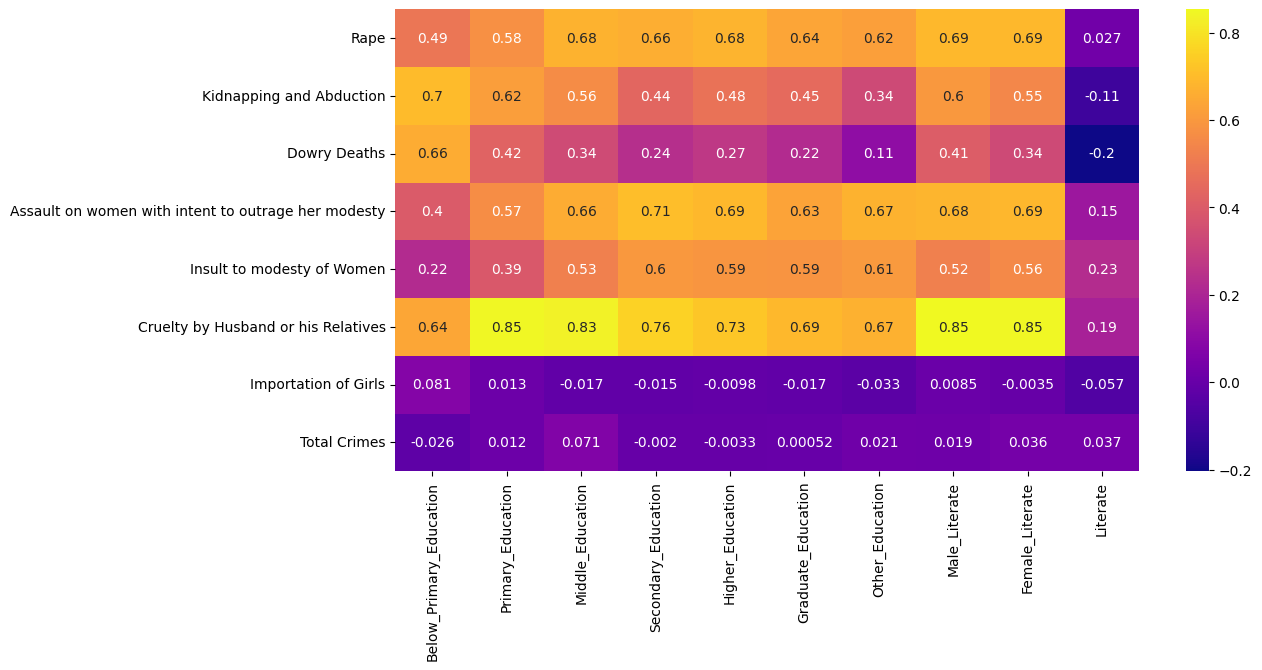

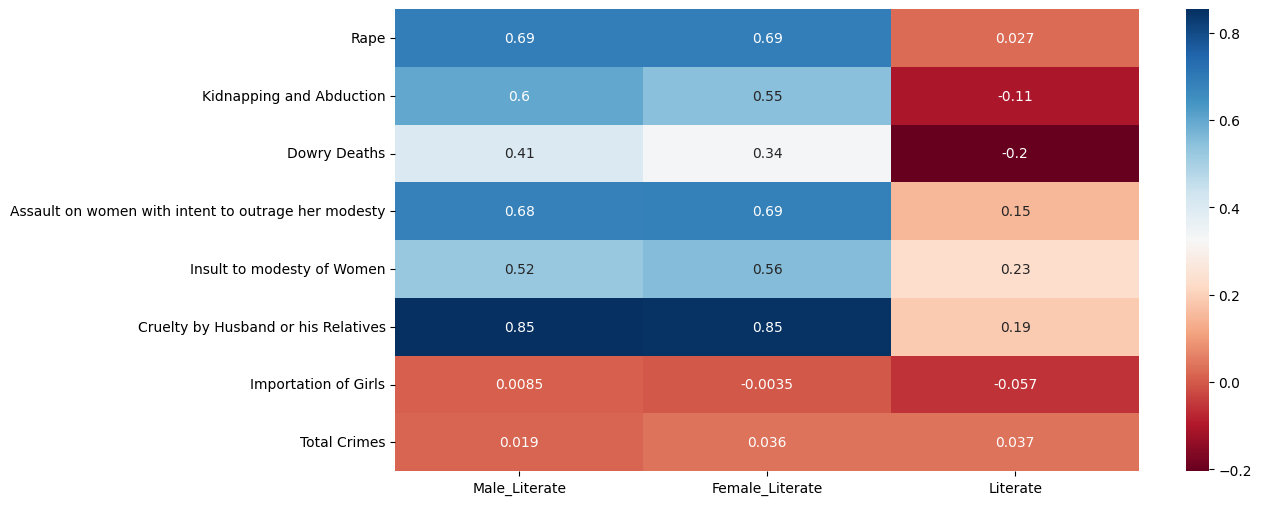

In [124]:
corr_data = edu_df_percent.select_dtypes(include=[np.number]).corr(method = 'pearson')

x_cols = ['Below_Primary_Education',
       'Primary_Education', 'Middle_Education', 'Secondary_Education',
       'Higher_Education', 'Graduate_Education', 'Other_Education','Male_Literate', 'Female_Literate', 'Literate']#, 'Literatacy', 'Illiteracy']
y_cols = ['Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Total Crimes']

corr_data_hm = corr_data.loc[y_cols, x_cols]
plt.figure(figsize=(12,6))
sns.heatmap(corr_data_hm, cmap='plasma', annot=True)

x_cols_abs = ['Male_Literate',
       'Female_Literate', 'Literate']

corr_data_hm_abs = corr_data.loc[y_cols, x_cols_abs]
plt.figure(figsize=(12,6))
sns.heatmap(corr_data_hm_abs, cmap='RdBu', annot=True)

In [125]:
corr_data_hm

,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Male_Literate,Female_Literate,Literate
Rape,0.49,0.58,0.68,0.66,0.68,0.64,0.62,0.69,0.69,0.03
Kidnapping and Abduction,0.70,0.62,0.56,0.44,0.48,0.45,0.34,0.60,0.55,-0.11
Dowry Deaths,0.66,0.42,0.34,0.24,0.27,0.22,0.11,0.41,0.34,-0.20
Assault on women with intent to outrage her modesty,0.40,0.57,0.66,0.71,0.69,0.63,0.67,0.68,0.69,0.15
Insult to modesty of Women,0.22,0.39,0.53,0.60,0.59,0.59,0.61,0.52,0.56,0.23
Cruelty by Husband or his Relatives,0.64,0.85,0.83,0.76,0.73,0.69,0.67,0.85,0.85,0.19
Importation of Girls,0.08,0.01,-0.02,-0.01,-0.01,-0.02,-0.03,0.01,-0.00,-0.06
Total Crimes,-0.03,0.01,0.07,-0.00,-0.00,0.00,0.02,0.02,0.04,0.04


<Figure size 1200x1800 with 0 Axes>

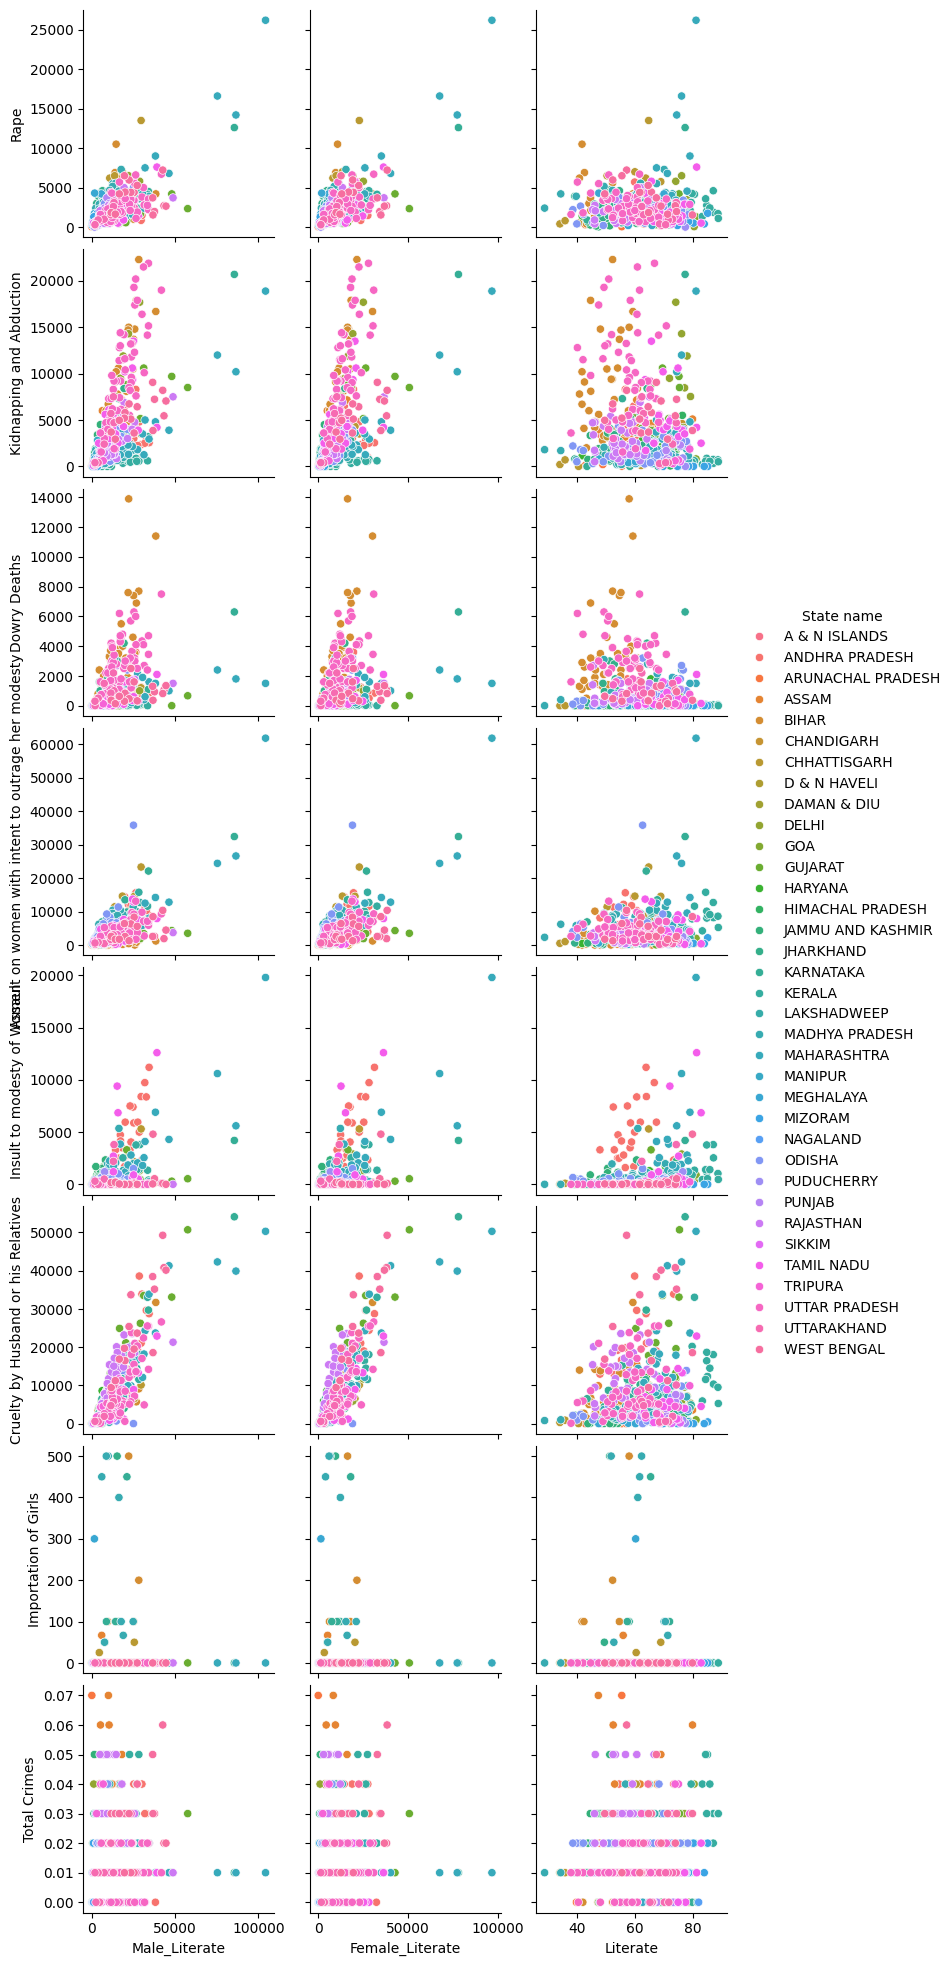

<Figure size 1200x1800 with 0 Axes>

In [96]:
sns.pairplot(edu_df_percent, x_vars = x_cols_abs, y_vars = y_cols, hue='State name')
plt.figure(figsize=(12, 18))

<Figure size 1200x1800 with 0 Axes>

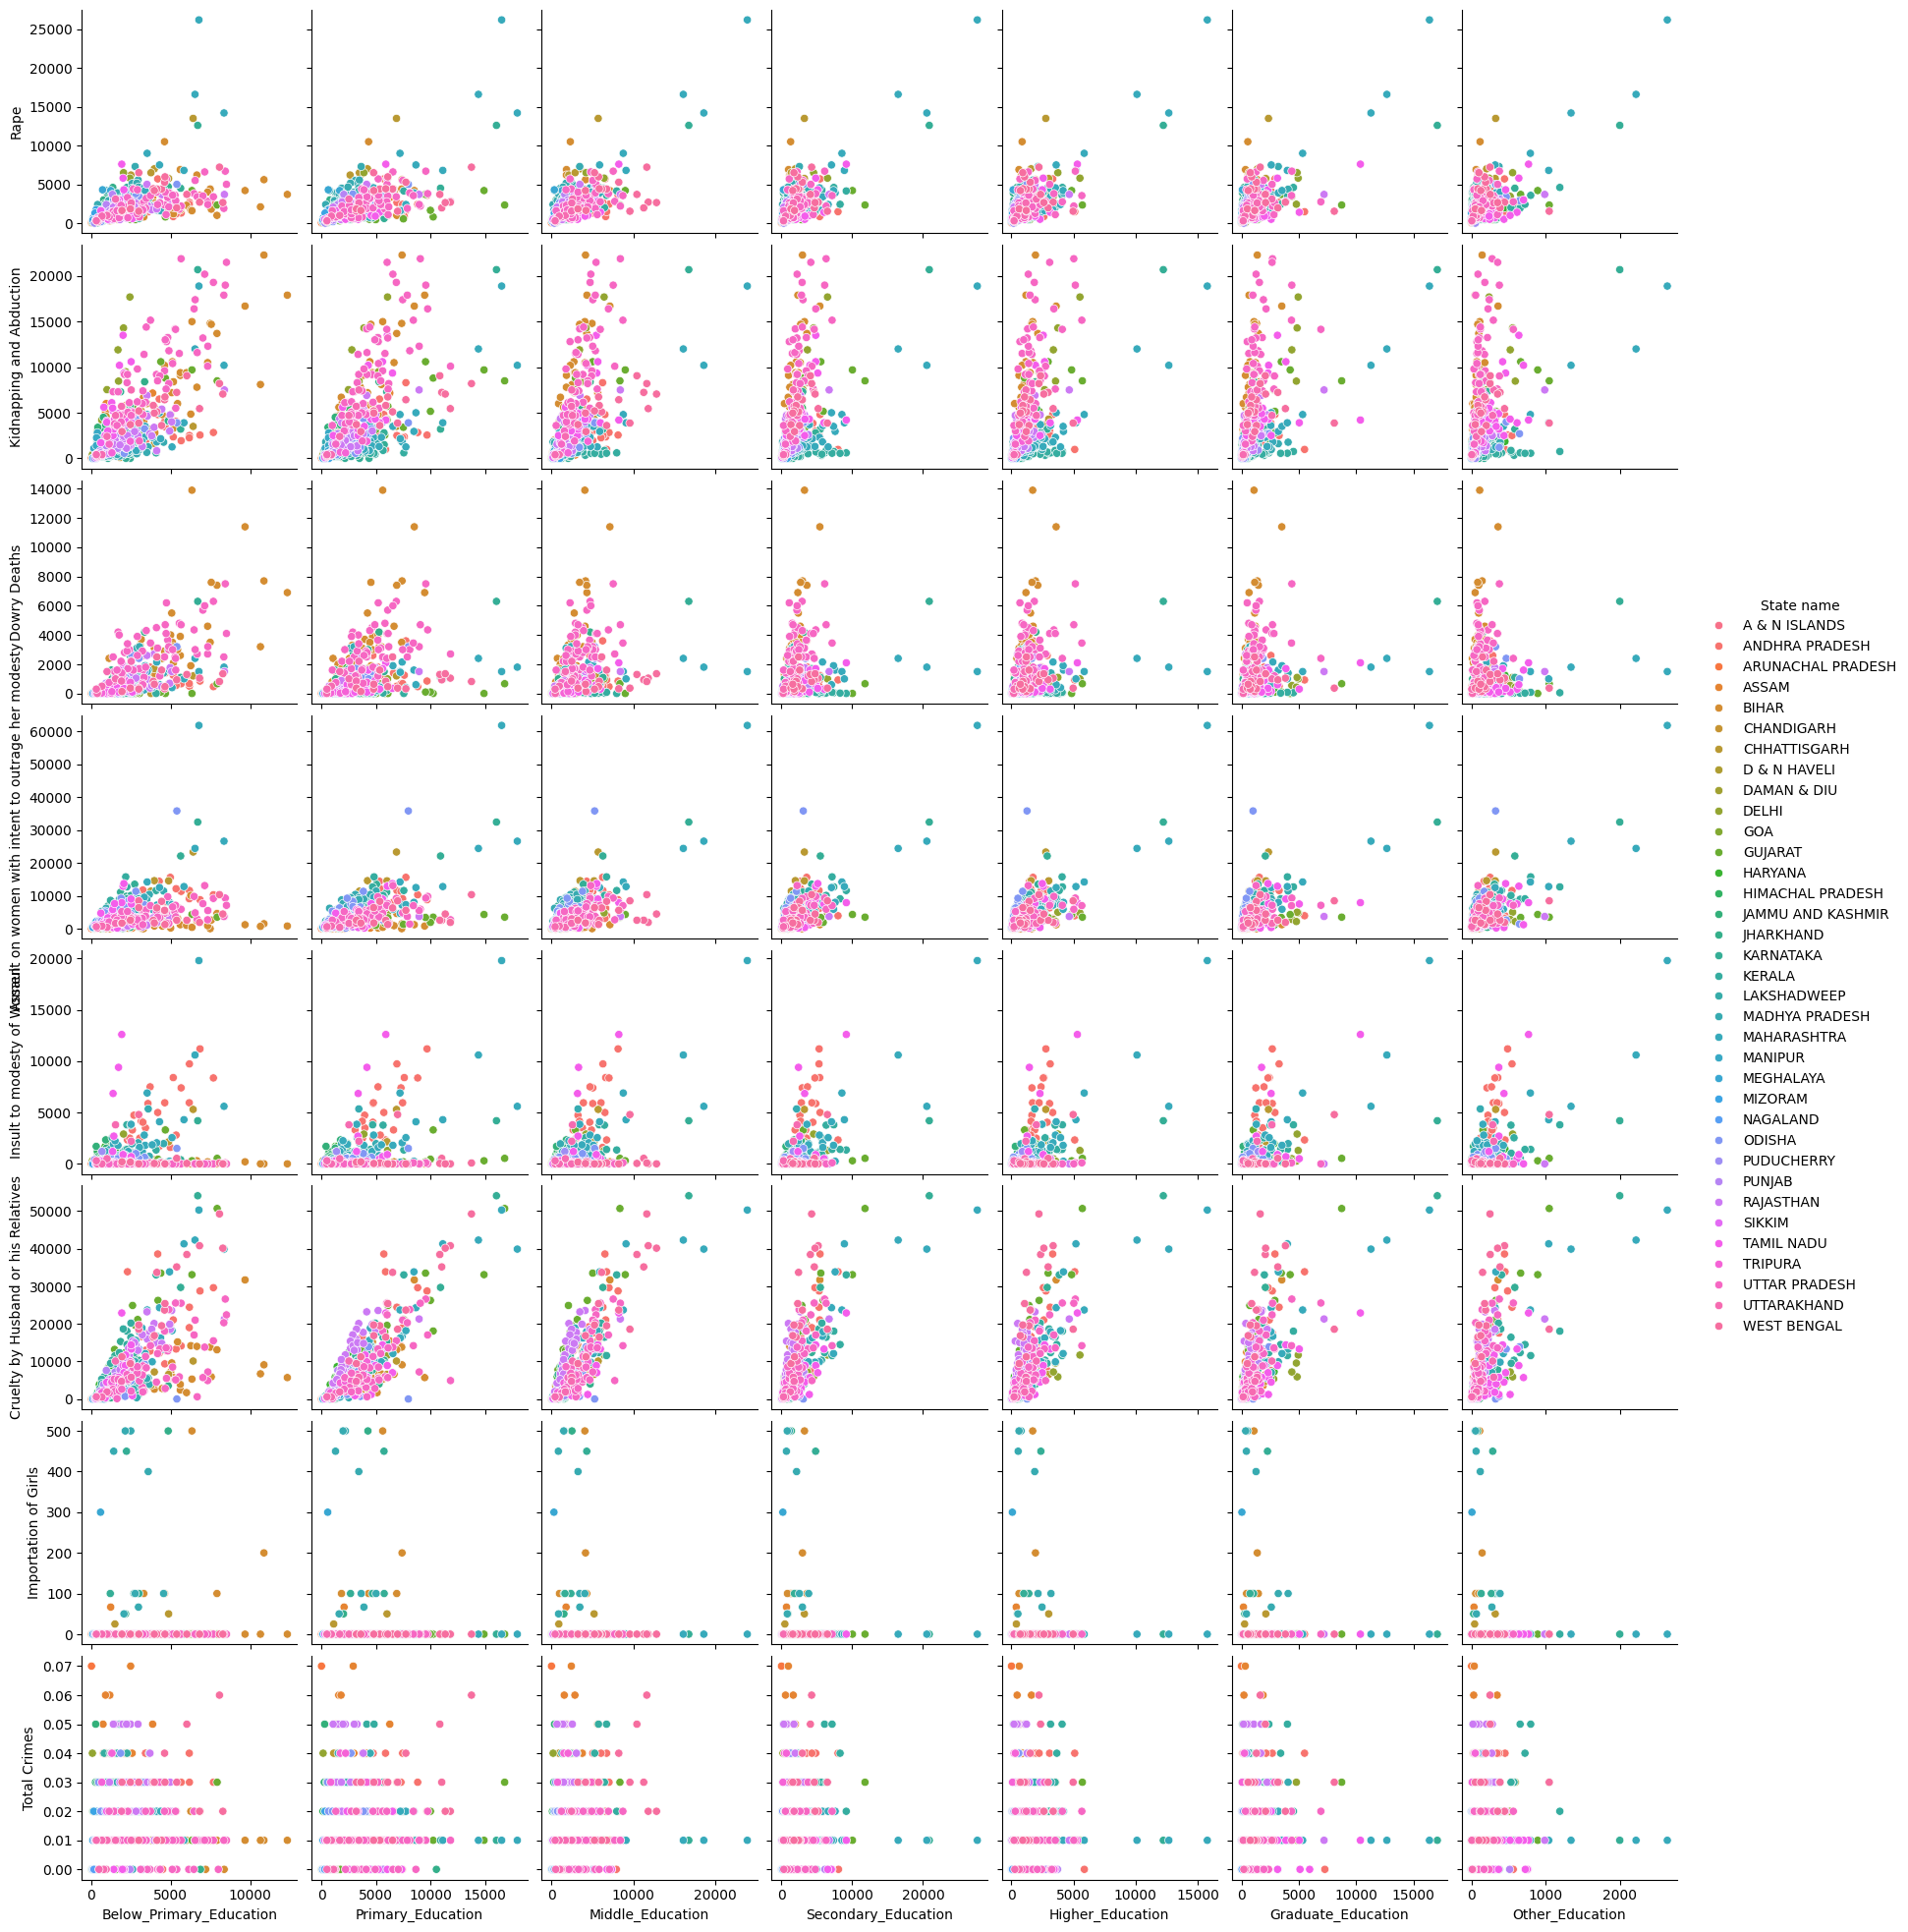

<Figure size 1200x1800 with 0 Axes>

In [97]:
sns.pairplot(edu_df_percent, x_vars = x_cols, y_vars = y_cols, hue = 'State name')
plt.figure(figsize=(12, 18))

In [126]:
# Prepare a list to store results
results_list = []

# Calculate the number of observations (n) used to calculate the correlation
n = len(edu_df_percent)  # Use the appropriate number of observations

# Iterate over each correlation coefficient
for crime in corr_data_hm.index:
    for education_category in corr_data_hm.columns:
        r = corr_data_hm.loc[crime, education_category]
        
        # Check if r is not equal to 1 or -1 to avoid division by zero
        if np.abs(r) < 1:  
            # Calculate the t statistic
            t_stat = r * np.sqrt((n - 2) / (1 - r ** 2))
            # Calculate the two-tailed p-value
            p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n - 2))
        else:
            t_stat = np.inf  # Set t_stat to infinity for perfect correlation
            p_value = 0.0    # Set p-value to 0 for perfect correlation

        # Append the result as a dictionary
        results_list.append({
            'Crime': crime,
            'Education Category': education_category, 
            'Correlation': r, 
            'p-value': p_value
        })

# Convert the results list to a DataFrame
results = pd.DataFrame(results_list)

# Interpret p-values
alpha = 0.05
results['Significant'] = results['p-value'] < alpha
results

,Crime,Education Category,Correlation,p-value,Significant
0,Rape,Below_Primary_Education,0.49,0.00,True
1,Rape,Primary_Education,0.58,0.00,True
2,Rape,Middle_Education,0.68,0.00,True
3,Rape,Secondary_Education,0.66,0.00,True
4,Rape,Higher_Education,0.68,0.00,True
5,Rape,Graduate_Education,0.64,0.00,True
6,Rape,Other_Education,0.62,0.00,True
7,Rape,Male_Literate,0.69,0.00,True
8,Rape,Female_Literate,0.69,0.00,True
9,Rape,Literate,0.03,0.51,False


As the p-value suggests the columns for which we can safely derive some conclusion with confidence, let's look into that and eliminate the rest

<Axes: >

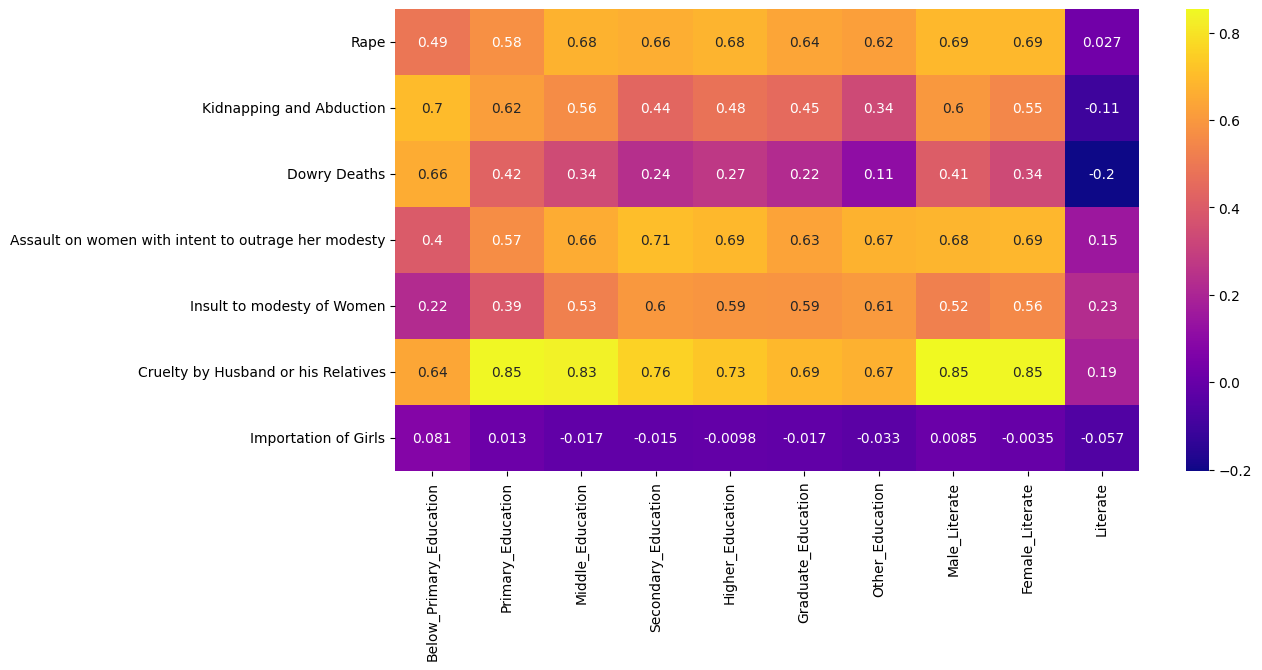

In [127]:
x_cols_final = list(results[results['Significant']]['Education Category'].drop_duplicates())
y_cols_final = list(results[results['Significant']]['Crime'].drop_duplicates())

corr_data_final = edu_df_percent.select_dtypes(include=[np.number]).corr(method = 'pearson')

corr_data_hm_final = corr_data_final.loc[y_cols_final, x_cols_final]
plt.figure(figsize=(12,6))
sns.heatmap(corr_data_hm_final, cmap='plasma', annot=True)

Key Insights by Crime Category with Education Levels
1)	Rape:
a)	The correlation values with education levels are notably high, especially for:
i)	Below Primary Education: 0.49
ii)	Primary Education: 0.58
iii)	Middle Education: 0.68
iv)	Secondary Education: 0.66
v)	Higher Education: 0.68
vi)	Graduate Education: 0.64
b)	Insight: The high correlations suggest that as the proportion of the population educated at higher levels increases, the reporting of rape incidents may also increase. This adjustment helps illuminate the potential link between education and increased awareness or reporting of such crimes, highlighting the importance of education in combating sexual violence.
2)	Kidnapping and Abduction:
a)	The correlation remains strong, especially:
i)	Below Primary Education: 0.70
ii)	Primary Education: 0.62
b)	Insight: The strong correlation with lower education levels indicates that individuals in these educational brackets might be at higher risk for kidnapping and abduction. This emphasizes the need for targeted educational programs to empower vulnerable populations.
3)	Dowry Deaths:
a)	The correlation with education levels varies significantly:
i)	Below Primary Education: 0.66
ii)	Strong correlations with lower education suggest persistent issues in societies with low educational attainment, but values drop significantly with higher education.
b)	Insight: While higher education may contribute to increased awareness, entrenched cultural practices related to dowry could persist regardless of educational levels. This calls for comprehensive education combined with societal change initiatives.
4)	Assault on Women:
a)	Moderate to high correlations across education levels, peaking at:
i)	Secondary Education: 0.71
b)	Insight: Increased educational attainment appears to correlate with heightened reporting of assaults. Education may empower women to speak out against violence, indicating a positive trend in societal attitudes towards these crimes.
5)	Insult to Modesty of Women:
a)	Moderate correlations, notably:
i)	Primary Education: 0.39
b)	Insight: The modest positive correlation suggests some awareness and reporting of such incidents, although the values indicate that this crime is less frequently reported compared to others. Further qualitative research may be needed to understand the social stigma associated with these incidents.
6)	Cruelty by Husband or His Relatives:
a)	Strong correlations, particularly with:
i)	Primary Education: 0.85
ii)	Middle Education: 0.83
b)	Insight: This data indicates that increased education may correlate with greater reporting of domestic abuse incidents, possibly due to heightened awareness of rights among educated individuals. This underscores the importance of educational programs addressing domestic violence and gender equality.
7)	Importation of Girls:
a)	Weak to negative correlations (e.g., -0.03 for Graduate Education) indicate little to no relationship between education levels and this crime type.
b)	Insight: The lack of correlation suggests that educational attainment alone may not significantly impact this crime type, indicating the need for targeted interventions that address cultural and socio-economic factors contributing to this issue.

And now for some comclusions:

Workers Data

In [109]:
worker_data = census_data[['State name', 'District name', 'Year', 'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers', 'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers', 'Other_Workers']]

In [ ]:
work_df = pd.merge(worker_data, 